# 1. Imports

In [297]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [298]:
content_raw = pd.read_pickle('toni_data_2609/speech_content.pkl')
contributions_raw = pd.read_pickle('toni_data_2609/contributions_simplified.pkl')
politicians_raw = pd.read_csv('toni_data_2609/politicians.csv')
factions_raw = pd.read_pickle('toni_data_2609/factions.pkl')
contributions_raw = pd.read_pickle('toni_data_2609/contributions_simplified.pkl')
topics_raw = pd.read_pickle('toni_data_2609/dims.pkl')

In [299]:
content_raw.head()

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,speech_content,date
0,0,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,Köhler,-1,Presidium of Parliament,präsident,11001150,Meine Damen und Herren! Ich eröffne die 2. Sit...,-640753200.0
1,1,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,Arnold,-1,Guest,präsident des bundesrats,-1,"Der Bundesrat ist versammelt, Herr Präsident.\n",-640753200.0
2,2,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,Köhler,-1,Presidium of Parliament,präsident,11001150,Ich danke für diese Erklärung. Ich stelle dami...,-640753200.0
3,3,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,Heuss,-1,Guest,bundespräsident,-1,"Ja, ich habe den Wunsch.\n",-640753200.0
4,4,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,Köhler,-1,Presidium of Parliament,präsident,11001150,Ich erteile dem Herrn Bundespräsidenten das Wo...,-640753200.0


In [300]:
contributions_raw.head()

,text_position,content,speech_id
0,0.0,(Nellen),1.0
0,1.0,"(Nrn. 1800, zu 1800, 3300, zu 3300 der Drucksa...",2.0
1,0.0,(Drucksache Nr. 3308),2.0
0,1.0,(Zurufe: Wiederholen!),4.0
1,0.0,(Zurufe: Sofort!),4.0


In [301]:
politicians_raw.head()

,ui,electoral_term,faction_id,first_name,last_name,birth_place,birth_country,birth_date,death_date,gender,profession,constituency,aristocracy,academic_title,institution_type,institution_name
0,11000001,5,5,Manfred,Abelein,Stuttgart,Deutschland,20.10.1930,17.01.2008,männlich,"Rechtsanwalt, Wirtschaftsprüfer, Universitätsp...",NaN,NaN,Prof. Dr.,Fraktion/Gruppe,Fraktion der Christlich Demokratischen Union/C...
1,11000001,6,5,Manfred,Abelein,Stuttgart,Deutschland,20.10.1930,17.01.2008,männlich,"Rechtsanwalt, Wirtschaftsprüfer, Universitätsp...",NaN,NaN,Prof. Dr.,Fraktion/Gruppe,Fraktion der Christlich Demokratischen Union/C...
2,11000001,7,5,Manfred,Abelein,Stuttgart,Deutschland,20.10.1930,17.01.2008,männlich,"Rechtsanwalt, Wirtschaftsprüfer, Universitätsp...",NaN,NaN,Prof. Dr.,Fraktion/Gruppe,Fraktion der Christlich Demokratischen Union/C...
3,11000001,8,5,Manfred,Abelein,Stuttgart,Deutschland,20.10.1930,17.01.2008,männlich,"Rechtsanwalt, Wirtschaftsprüfer, Universitätsp...",NaN,NaN,Prof. Dr.,Fraktion/Gruppe,Fraktion der Christlich Demokratischen Union/C...
4,11000001,9,5,Manfred,Abelein,Stuttgart,Deutschland,20.10.1930,17.01.2008,männlich,"Rechtsanwalt, Wirtschaftsprüfer, Universitätsp...",NaN,NaN,Prof. Dr.,Fraktion/Gruppe,Fraktion der Christlich Demokratischen Union/C...


In [302]:
factions_raw.head(50)

,id,abbreviation,faction_name
0,0,AfD,Fraktion Alternative für Deutschland
1,2,BP,Fraktion Bayernpartei
2,4,Bündnis 90/Die Grünen,Fraktion BÜNDNIS 90/DIE GRÜNEN
3,7,DIE LINKE.,Fraktion DIE LINKE.
4,9,DP/DPB,Fraktion DP/DPB (Gast)
5,12,DRP,Fraktion DRP (Gast)
6,6,DA,Fraktion Demokratische Arbeitsgemeinschaft
7,8,DP,Fraktion Deutsche Partei
8,11,DPB,Fraktion Deutsche Partei Bayern
9,9,DP/DPB,Fraktion Deutsche Partei/Deutsche Partei Bayern


In [303]:
contributions_raw.tail(40)

,text_position,content,speech_id
3,10.0,(Beifall bei Abgeordneten der LINKEN),846668.0
4,9.0,(Beifall bei der LINKEN - Henning Otte [CDU/CS...,846668.0
5,8.0,(Niels Annen [SPD]: Hört! Hört! - Zuruf von de...,846668.0
6,7.0,(Henning Otte [CDU/CSU]: Das sagt ja sonst imm...,846668.0
7,6.0,(Dr. Tobias Lindner [BÜNDNIS 90/DIE GRÜNEN]: D...,846668.0
8,5.0,(Beifall bei der LINKEN),846668.0
9,4.0,(Widerspruch des Abg. Niels Annen [SPD] Hennin...,846668.0
10,3.0,(Henning Otte [CDU/CSU]: Da bin ich mal gespan...,846668.0
11,2.0,(Beifall bei der LINKEN - Henning Otte [CDU/CS...,846668.0
12,1.0,(Beifall bei der LINKEN),846668.0


## 2. Data Cleaning

### 2.1 Duplicates

In [304]:
content = content_raw.copy()

# Check for duplicates
print(content.duplicated().sum())

# Remove duplicates
content.drop_duplicates(inplace=True)

# show duplicates of ids
content[content.duplicated(subset='id', keep=False)].sort_values(by='id')

0


,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,speech_content,date


In [305]:
len(content)

967004

In [306]:
politicians = politicians_raw.copy()

# Check for duplicates
print(politicians.duplicated().sum())

# Remove duplicates
politicians.drop_duplicates(inplace=True)

# show duplicates of ids and electoral terms
politicians[politicians.duplicated(subset=['ui', 'electoral_term'], keep=False)].sort_values(by=['ui', 'electoral_term'])


# Remove duplications: keep one name if namechange (marriage), keep only longest academic title if multiple, keep only one faction if multiple
# Step 1: Function to consolidate values, including longest title, actual faction, institution name, and name streamlining
def consolidate_group(group):
    # 1. Longest academic title
    longest_title_idx = group['academic_title'].dropna().str.len().idxmax() if not group['academic_title'].dropna().empty else None
    if longest_title_idx is not None:
        longest_title = group.loc[longest_title_idx, 'academic_title']
        group['academic_title'] = group['academic_title'].fillna(longest_title)  # Fill if we found a valid longest title

    # 2. Faction: prefer entries with a valid faction (i.e., non-null faction_id and non-Fraktionslos)
    valid_faction = group.loc[group['faction_id'].notnull()]
    if not valid_faction.empty:
        valid_faction_row = valid_faction.iloc[0]  # Take the first valid faction row
        group['faction_id'] = group['faction_id'].fillna(valid_faction_row['faction_id'])
        group['institution_name'] = group['institution_name'].fillna(valid_faction_row['institution_name'])

    # 3. Streamline names: prioritize the most recent last name and first name
    most_recent_entry = group.iloc[-1]  # Take the most recent entry as the baseline for names
    group['last_name'] = group['last_name'].fillna(most_recent_entry['last_name'])
    group['first_name'] = group['first_name'].fillna(most_recent_entry['first_name'])

    return group

# Step 2: Apply the function, grouping by both 'ui' and 'electoral_term'
politicians = politicians.groupby(['ui', 'electoral_term']).apply(consolidate_group)

# Optional: Reset index if needed
politicians.reset_index(drop=True, inplace=True)

# Step 3: Drop duplicates within each group, keeping the relevant rows --> otherwise dfs cannot be merged
politicians['ui'] = politicians['ui'].astype(int)
politicians['electoral_term'] = politicians['electoral_term'].astype(int)
politicians = politicians.drop_duplicates(subset=['ui', 'electoral_term'], keep='first')

unique_combinations = politicians[['ui', 'electoral_term']].drop_duplicates()
print('unique politicians after dupl removal:', len(unique_combinations))

759
unique politicians after dupl removal: 12492


### 2.2 Missing Values

In [307]:
# Check for missing values in each column
print(content.isnull().sum())

# Check for values = -1 in each column
print((content == -1).sum())

# convert all -1 into NaN
content.replace(-1, np.nan, inplace=True)

print(content.isnull().sum())

# Problem with missing politician_id and faction_id

id                    0
electoral_term        0
session               0
first_name            0
document_url          0
last_name             0
faction_id            0
position_short        0
position_long     58908
politician_id         0
speech_content        0
date                  0
dtype: int64
id                     0
electoral_term         0
session                0
first_name             0
document_url           0
last_name              0
faction_id        605415
position_short         0
position_long          0
politician_id      37798
speech_content         0
date                   0
dtype: int64
id                     0
electoral_term         0
session                0
first_name             0
document_url           0
last_name              0
faction_id        605415
position_short         0
position_long      58908
politician_id      37798
speech_content         0
date                   0
dtype: int64


In [308]:
# check for missing values in each column politicians
print(politicians.isnull().sum())

# check for values = -1 in each column politicians
print((politicians == -1).sum())

# convert all -1 into NaN
politicians.replace(-1, np.nan, inplace=True)

print(politicians.isnull().sum())


ui                      0
electoral_term          0
faction_id              0
first_name              0
last_name               0
birth_place            26
birth_country          22
birth_date              0
death_date              0
gender                 22
profession             40
constituency        10776
aristocracy         12390
academic_title       9159
institution_type        0
institution_name        0
dtype: int64
ui                   0
electoral_term       0
faction_id          39
first_name           0
last_name            0
birth_place          0
birth_country        0
birth_date           0
death_date           0
gender               0
profession           0
constituency         0
aristocracy          0
academic_title       0
institution_type     0
institution_name     0
dtype: int64
ui                      0
electoral_term          0
faction_id             39
first_name              0
last_name               0
birth_place            26
birth_country          22
birth_da

In [309]:
# missing values in contribution df
print(contributions_raw.isnull().sum())


text_position    0
content          0
speech_id        0
dtype: int64


### 2.3 Fill missing values

In [310]:
# Match Politician ID based on name and electoral term
politicians['first_name'] = politicians['first_name'].str.lower()
politicians['last_name'] = politicians['last_name'].str.lower()

content['first_name'] = content['first_name'].str.lower()
content['last_name'] = content['last_name'].str.lower()


# show duplicated of first name, last name and electoral term
duplicated_names_terms = politicians[politicians.duplicated(subset=['first_name', 'last_name', 'electoral_term'], keep=False)].sort_values(by=['first_name', 'last_name', 'electoral_term'])

print(len(duplicated_names_terms))

#since there are only 8 duplicates of first_name, last_name, and electoral term; we can use the ui to match the speeches

# to have a clean match, we need to remove the duplicates
politicians_cleaned_name_term_only = politicians.drop_duplicates(subset=['first_name', 'last_name', 'electoral_term'])  


8


In [311]:
# Match Politician ID based on name and electoral term only if there is no ambiguity

content_filled = pd.merge(content, politicians_cleaned_name_term_only[['ui', 'first_name', 'last_name', 'electoral_term']], how='left',
                    left_on=['first_name', 'last_name', 'electoral_term'], right_on=['first_name', 'last_name', 'electoral_term'])

content_filled.head()

# if politician_id is na, fill with ui
content_filled['politician_id'] = content_filled['politician_id'].fillna(content_filled['ui'])



content_filled.drop(columns=['ui'], inplace=True)
content_filled.head()

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,speech_content,date
0,0,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,NaN,Presidium of Parliament,präsident,11001150.0,Meine Damen und Herren! Ich eröffne die 2. Sit...,-640753200.0
1,1,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,arnold,NaN,Guest,präsident des bundesrats,NaN,"Der Bundesrat ist versammelt, Herr Präsident.\n",-640753200.0
2,2,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,NaN,Presidium of Parliament,präsident,11001150.0,Ich danke für diese Erklärung. Ich stelle dami...,-640753200.0
3,3,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,heuss,NaN,Guest,bundespräsident,NaN,"Ja, ich habe den Wunsch.\n",-640753200.0
4,4,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,NaN,Presidium of Parliament,präsident,11001150.0,Ich erteile dem Herrn Bundespräsidenten das Wo...,-640753200.0


In [312]:
#Check for correct merge
print(len(content_filled))
print(content)

967004
            id  electoral_term  session first_name  \
0            0               1        2              
1            1               1        2              
2            2               1        2              
3            3               1        2              
4            4               1        2              
...        ...             ...      ...        ...   
56288  1120313              20       16    lennard   
56289  1120314              20       16     yvonne   
56290  1120315              20       16     stefan   
56291  1120316              20       16     yvonne   
56292  1120317              20       16        uli   

                                            document_url last_name  \
0      https://dip21.bundestag.de/dip21/btp/01/01002.pdf    köhler   
1      https://dip21.bundestag.de/dip21/btp/01/01002.pdf    arnold   
2      https://dip21.bundestag.de/dip21/btp/01/01002.pdf    köhler   
3      https://dip21.bundestag.de/dip21/btp/01/01002.pdf     heu

In [313]:
# show ehere politician id is na and electoral period 18
content_filled[(content_filled['politician_id'].isnull()) & (content_filled['electoral_term'] == 18)]

# if first_name tomas maizi, fill first name with Thomas, last name Maizière, faction_id 5, position_short Minister, politician id 11004105
content_filled.loc[(content_filled['first_name'] == 'thomas maizi'), 'last_name'] = 'maizière'
content_filled.loc[(content_filled['first_name'] == 'thomas maizi'), 'faction_id'] = 5
content_filled.loc[(content_filled['first_name'] == 'thomas maizi'), 'position_short'] = 'Minister'
content_filled.loc[(content_filled['first_name'] == 'thomas maizi'), 'politician_id'] = 11004105
content_filled.loc[(content_filled['first_name'] == 'thomas maizi'), 'first_name'] = 'Thomas'

content_filled[(content_filled['politician_id'].isnull()) & (content_filled['electoral_term'] == 18)]

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,speech_content,date
794137,794137,18,2,hans-peter,https://dip21.bundestag.de/dip21/btp/18/18002.pdf,uhl,5.0,Member of Parliament,,NaN,Frau Präsidentin! Meine verehrten Damen und He...,1.384726e+09
794139,794139,18,2,hans-peter,https://dip21.bundestag.de/dip21/btp/18/18002.pdf,uhl,5.0,Member of Parliament,,NaN,Nein. Diese Dinge sind für mich ausdiskutiert ...,1.384726e+09
794279,794279,18,3,ernst,https://dip21.bundestag.de/dip21/btp/18/18003.pdf,burgbacher,NaN,Secretary of State,parl. staatssekretär beim bundesminister für w...,NaN,"\nFrau Kollegin Groth, die Bundesregierung set...",1.385590e+09
794283,794283,18,3,ernst,https://dip21.bundestag.de/dip21/btp/18/18003.pdf,burgbacher,NaN,Secretary of State,parl. staatssekretär beim bundesminister für w...,NaN,"\nFrau Kollegin, ich habe ja gerade gesagt - d...",1.385590e+09
794286,794286,18,3,ernst,https://dip21.bundestag.de/dip21/btp/18/18003.pdf,burgbacher,NaN,Secretary of State,parl. staatssekretär beim bundesminister für w...,NaN,"\nHerr Kollege, auch darüber haben wir ausführ...",1.385590e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
843752,843752,18,233,claudia roth,https://dip21.bundestag.de/dip21/btp/18/18233.pdf,https,NaN,Presidium of Parliament,vizepräsidentin,NaN,//www.zukunft-erdgas.info/fileadmin/public/PDF...,1.494968e+09
843818,843818,18,233,merkel die heute,https://dip21.bundestag.de/dip21/btp/18/18233.pdf,sagte,NaN,Chancellor,,NaN,Für Integration müssen wir uns\naufeinander ei...,1.494968e+09
844296,844296,18,235,hans-peter,https://dip21.bundestag.de/dip21/btp/18/18235.pdf,uhl,5.0,Member of Parliament,,NaN,Frau Präsidentin! Meine verehrten Kolleginnen ...,1.495141e+09
845308,845308,18,239,hans-peter,https://dip21.bundestag.de/dip21/btp/18/18239.pdf,uhl,5.0,Member of Parliament,,NaN,Frau Präsidentin! Meine verehrten Kolleginnen ...,1.497992e+09


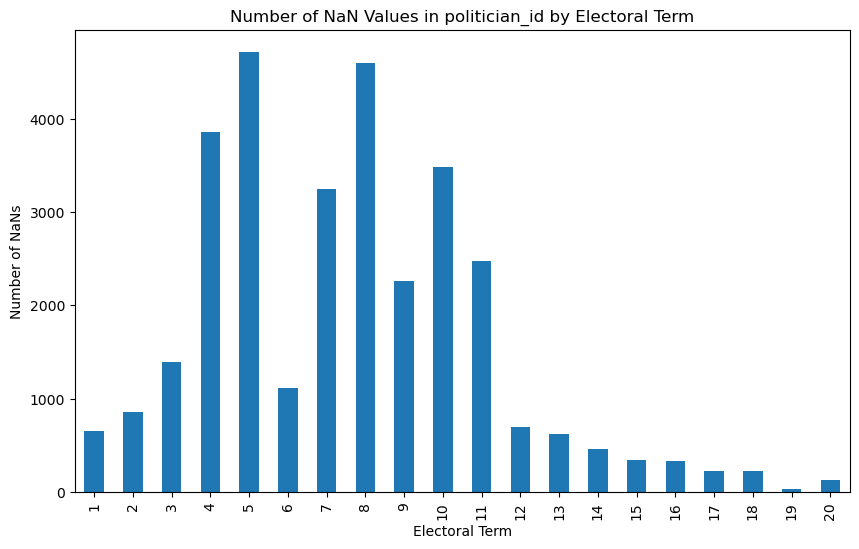

In [314]:
# Step 1: Check for NaN values in the 'politician_id' column
content_filled['politician_id_isnull'] = content_filled['politician_id'].isnull()

# Step 2: Group by 'electoral_term' and sum the NaN counts
nans_by_electoral_term = content_filled.groupby('electoral_term')['politician_id_isnull'].sum()

# Step 3: Plot the result as a bar graph
nans_by_electoral_term.plot(kind='bar', figsize=(10,6))
plt.title('Number of NaN Values in politician_id by Electoral Term')
plt.xlabel('Electoral Term')
plt.ylabel('Number of NaNs')
plt.show()

# In the preiod of interest, almost all politician IDs are there

The amount of rows without politician IDs in our periods of interest is very low. We will procees without trying to fill them further,

In [315]:
content_filled2 = content_filled.copy()
content_filled2.drop(columns=['politician_id_isnull', ], inplace=True)


# show where faction_id in na
content_filled2[content_filled2['faction_id'].isnull()]

# fill faction id based on politician id and electoral term
content_filled2 = pd.merge(content_filled2, politicians[['ui', 'faction_id', 'electoral_term']], how='left',
                    left_on=['politician_id', 'electoral_term'], right_on=['ui', 'electoral_term'])

# if faction_id_x is na, fill with faction_id_y
content_filled2['faction_id_x'] = content_filled2['faction_id_x'].fillna(content_filled2['faction_id_y'])
content_filled2.drop(columns=['ui', 'faction_id_y'], inplace=True)
content_filled2.rename(columns={'faction_id_x': 'faction_id'}, inplace=True)

In [316]:
# replace all -1 with NaN
content_filled2.replace(-1, np.nan, inplace=True)

print(content_filled2.isnull().sum())


id                    0
electoral_term        0
session               0
first_name            0
document_url          0
last_name             0
faction_id        48456
position_short        0
position_long     58908
politician_id     31705
speech_content        0
date                  0
dtype: int64


In [317]:
factions = factions_raw.drop_duplicates(subset=['id'])

content_merged = content_filled2.merge(factions[['id', 'abbreviation']], left_on='faction_id', right_on='id', how='left')
content_merged.drop(columns=['id_y'], inplace=True)
content_merged.rename(columns={'abbreviation': 'faction', 'id_x':'id'}, inplace=True)

### 2.4 Sorting

In [318]:
# Sort dataframe by date and id
content_df = content_merged.sort_values(by=['date', 'id'])
content_df

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,speech_content,date,faction
0,0,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5.0,Presidium of Parliament,präsident,11001150.0,Meine Damen und Herren! Ich eröffne die 2. Sit...,-6.407532e+08,CDU/CSU
1,1,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,arnold,NaN,Guest,präsident des bundesrats,NaN,"Der Bundesrat ist versammelt, Herr Präsident.\n",-6.407532e+08,NaN
2,2,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5.0,Presidium of Parliament,präsident,11001150.0,Ich danke für diese Erklärung. Ich stelle dami...,-6.407532e+08,CDU/CSU
3,3,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,heuss,NaN,Guest,bundespräsident,NaN,"Ja, ich habe den Wunsch.\n",-6.407532e+08,NaN
4,4,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5.0,Presidium of Parliament,präsident,11001150.0,Ich erteile dem Herrn Bundespräsidenten das Wo...,-6.407532e+08,CDU/CSU
...,...,...,...,...,...,...,...,...,...,...,...,...,...
922608,1075922,20,187,thomas,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,seitz,0.0,Not found,None,11004891.0,\n\nSehr geehrte Frau Präsidentin! Meine Damen...,1.727222e+09,AfD
922609,1075923,20,187,petra,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,pau,7.0,Presidium of Parliament,Vizepräsidentin,11003206.0,\n\nHerr Abgeordneter.,1.727222e+09,DIE LINKE.
922610,1075924,20,187,thomas,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,seitz,18.0,Member of Parliament,None,11004891.0,\n\nVielen Dank.\n\n({0}),1.727222e+09,Fraktionslos
922611,1075925,20,187,petra,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,pau,7.0,Presidium of Parliament,Vizepräsidentin,11003206.0,\n\nFür die SPD-Fraktion hat die Kollegin Ange...,1.727222e+09,DIE LINKE.


### 2.5 Data types

In [319]:
# show datatypes of content_df
content_df.dtypes

id                  int64
electoral_term      int32
session             int32
first_name         object
document_url       object
last_name          object
faction_id        float64
position_short     object
position_long      object
politician_id     float64
speech_content     object
date              float64
faction            object
dtype: object

In [320]:
#connvert date to date without time
content_df['date'] = pd.to_datetime(content_df['date'], unit='s').dt.date

#convert politician_id to int if it is not nan
content_df['politician_id'] = content_df['politician_id'].fillna(-1)
content_df['politician_id'] = content_df['politician_id'].astype(int)

#convert faction_id to int if it is not nan
content_df['faction_id'] = content_df['faction_id'].fillna(-1)
content_df['faction_id'] = content_df['faction_id'].astype(int)

# show datatypes of content_df
content_df.dtypes


id                 int64
electoral_term     int32
session            int32
first_name        object
document_url      object
last_name         object
faction_id         int64
position_short    object
position_long     object
politician_id      int64
speech_content    object
date              object
faction           object
dtype: object

In [321]:
#show data types of politicians df
politicians.dtypes

#convert faction_id to int
politicians['faction_id'] = politicians['faction_id'].fillna(-1)
politicians['faction_id'] = politicians['faction_id'].astype(int)

In [322]:
contributions = contributions_raw.copy()
# change text position and speech id to int
contributions['text_position'] = contributions['text_position'].astype(int)
contributions['speech_id'] = contributions['speech_id'].astype(int)

# show data types of contributions df
contributions.dtypes

text_position     int64
content          object
speech_id         int64
dtype: object

### 2.6 Categoritzation of Contributions DF

#### 2.6.1 Allocation of contribution to parties

In [323]:
# out of column content, check which faction is in there
# Step 1: Create a mapping of faction name/abbreviation to faction_id
faction_mapping = {row['abbreviation']: row['id'] for _, row in factions_raw.iterrows()}

# add Linken to mapping with number 7
faction_mapping['Linken'] = 7
faction_mapping['DIE Linke'] = 7
faction_mapping['GRÜNEN'] = 4
faction_mapping['CDU'] = 5

# keep only rows in dictionary where faction id is 25, 5, 7
faction_mapping = {key: value for key, value in faction_mapping.items() if value in [25, 5, 7, 15, 0, 4,3, 20, 18]}
print(faction_mapping)

def extract_factions(content):
    matched_factions = []
    for faction, faction_id in faction_mapping.items():
        if faction.lower() in content.lower():  # Case-insensitive search
            matched_factions.append(faction_id)  # Add faction_id to the list of matches
    if matched_factions:
        return matched_factions  # Return list of faction_ids if any found
    return np.nan  # Return NaN if no factions found


# Step 4: Apply the function to the content of the last 40 rows
contributions['faction_ids'] = contributions['content'].apply(extract_factions)


{'AfD': 0, 'Bündnis 90/Die Grünen': 4, 'DIE LINKE.': 7, 'CDU/CSU': 5, 'FDP': 15, 'SPD': 25, 'Fraktionslos': 18, 'BSW': 3, 'Gast': 20, 'Linken': 7, 'DIE Linke': 7, 'GRÜNEN': 4, 'CDU': 5}


#### 2.6.2 Allocation contribution types

In [324]:
# Dictionary with the reaction types found in the data
reaction_types = {
    "Beifall": "Applause",
    "Zuruf": "Interjection",
    "Heiterkeit": "Cheerfulness",
    "Widerspruch": "Objection",
    "Lachen": "Laughter",
    "Unruhe": "Disturbance",
    "Zustimmung": "Agreement",
    "]:" : "Comment",
    "] :" : "Comment",
    "Abg.": "Comment",
}

# Function to classify multiple reactions based on content
def classify_reactions(content):
    matched_reactions = []
    for key, classification in reaction_types.items():
        if key.lower() in content.lower():  # Case-insensitive search
            matched_reactions.append(classification)
    return matched_reactions if matched_reactions else ["Other"]  # Return "Other" if no match is found

# Apply the classification function to the content column
contributions['reaction_types'] = contributions['content'].apply(classify_reactions)

# Display the updated DataFrame
contributions.sample(40)


,text_position,content,speech_id,faction_ids,reaction_types
108,7,(Northeim),522597,NaN,[Other]
0,2,(Beifall beim BÜNDNIS 90/DIE GRÜNEN Zuruf von ...,642725,"[4, 25, 4]","[Applause, Interjection]"
0,3,(Horst Sielaff [SPD]: Stimmt doch gar nicht! E...,574861,[25],[Comment]
13,9,(Dr. Freiherr Spies von Büllesheim [CDU/ CSU]:...,318316,[5],[Comment]
5,2,(Beifall bei der SPD sowie bei Abgeordneten de...,505687,"[25, 4]",[Applause]
0,5,(Beifall bei der CDU/CSU sowie des Abg. Thomas...,795086,"[5, 7, 5]","[Applause, Comment]"
6,10,(Beifall bei der FDP - Gerold Reichenbach [SPD...,728964,"[15, 25]","[Applause, Comment]"
3,19,"(Beifall bei der SPD, dem BÜNDNIS 90/DIE GRÜNE...",586678,"[4, 5, 25, 4, 5]","[Applause, Comment]"
15,24,(Hans Michelbach [CDU/CSU]: Sie machen Steuere...,675741,"[5, 5]",[Comment]
104,46,(Göttingen),446617,NaN,[Other]


In [325]:
# show everything marked as Other
# Step 1: Check for rows where 'Other' is the only reaction type
only_other_reactions = contributions[contributions['reaction_types'].apply(lambda x: x == ["Other"])]

only_other_reactions.sample(40)

# It is striking that a lot of "contributions" are just names of cites. we will need to filter them out


,text_position,content,speech_id,faction_ids,reaction_types
109,86,(Düren),564747,NaN,[Other]
5,8,(Sehr gut! bei der CDU/CSU.),84099,"[5, 5]",[Other]
29,181,(Göppingen),402982,NaN,[Other]
4,0,(Fürth),637458,NaN,[Other]
156,56,(München),470739,NaN,[Other]
25,13,(Hessen),537389,NaN,[Other]
0,1,(BÜNDNIS 90/DIE GRÜNEN),714679,"[4, 4]",[Other]
2,14,(CDU),23122,[5],[Other]
12,2,(Dr. Furler),28910,NaN,[Other]
120,113,(Freiburg),456025,NaN,[Other]


In [326]:
# read excel to list
cities = pd.read_excel('toni_data_2609/German_cities.xlsx', )
cities = cities['Stadt'].tolist()

In [327]:
# check whether the contribution is just a city name
def contains_city_in_parentheses(content):
    for city in cities:
        if f"({city})" in content:
            return True
    return False

# Apply the function to the content column
contributions['city_mentions'] = contributions['content'].apply(contains_city_in_parentheses)

#show contributions where city mentions is true
contributions[contributions['city_mentions'] == True].sample(40)



,text_position,content,speech_id,faction_ids,reaction_types,city_mentions
7,34,(Zwickau),806754,NaN,[Other],True
46,46,(Bad Schwalbach),376014,NaN,[Other],True
22,39,(Leipzig),743311,NaN,[Other],True
179,16,(Bottrop),494307,NaN,[Other],True
16,39,(Berlin),771226,NaN,[Other],True
3,5,(Herborn),746819,NaN,[Other],True
75,10,(Jena),519099,NaN,[Other],True
32,47,(Schleiden),174923,NaN,[Other],True
4,4,(Mainz),409680,NaN,[Other],True
14,66,(Gerlingen),478854,NaN,[Other],True


In [328]:
# Filter out all contributions that are just city names
contributions_without_cities = contributions[~contributions['city_mentions']]
#check for other reactions
# Step 1: Check for rows where 'Other' is the only reaction type
only_other_reactions = contributions_without_cities[contributions_without_cities['reaction_types'].apply(lambda x: x == ["Other"])]
only_other_reactions = contributions_without_cities[contributions_without_cities['faction_ids'].isna()]

# save as excel to inspect
#only_other_reactions.to_excel('toni_data_2609/only_other_reactions.xlsx')

In [329]:
#change all "other" to "Exclamation" if content contains "!"

# Function to check and update the reaction_type
def update_reaction_type(row):
    if "!" in row['content'] and "Other" in row['reaction_types']:
        return ["Exclamation"]  # Replace "Other" with "Exclamation"
    return row['reaction_types']  # Keep the original value if condition not met

# Apply the function to the DataFrame
contributions_without_cities['reaction_types'] = contributions_without_cities.apply(update_reaction_type, axis=1)

# Display the updated DataFrame to check changes
contributions_without_cities[['content', 'reaction_types']].head()



/var/folders/6z/wxdl_1mn50n99828tcf859gh0000gp/T/ipykernel_28981/69611412.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contributions_without_cities['reaction_types'] = contributions_without_cities.apply(update_reaction_type, axis=1)


,content,reaction_types
0,(Nellen),[Other]
0,"(Nrn. 1800, zu 1800, 3300, zu 3300 der Drucksa...",[Other]
1,(Drucksache Nr. 3308),[Other]
0,(Zurufe: Wiederholen!),[Interjection]
1,(Zurufe: Sofort!),[Interjection]


The rest of the unclassified contributions seem to be wrong data. We will delete them to continue

In [330]:
#Filter out all contributions  and safe in contributions_df only if reaction type is not other
contributions_df = contributions_without_cities[~contributions_without_cities['reaction_types'].apply(lambda x: x == ["Other"])]

contributions_df.head()

,text_position,content,speech_id,faction_ids,reaction_types,city_mentions
0,1,(Zurufe: Wiederholen!),4,NaN,[Interjection],False
1,0,(Zurufe: Sofort!),4,NaN,[Interjection],False
0,0,(Zurufe: Welcher Umdruck?),6,NaN,[Interjection],False
0,4,(Unruhe. - Glocke des Präsidenten.),10,NaN,[Disturbance],False
1,3,(Heiterkeit. - Abg. Schütz: Ausgezeichnet!),10,NaN,"[Cheerfulness, Comment]",False


### 2.7 Safe DFs for easier computation later

In [331]:
# safe content
content_df.to_pickle('content_df.pkl')
politicians.to_pickle('politicians_df.pkl')
contributions_df.to_pickle('contributions_df.pkl')

## 3. Analysis of Electoral Terms

### 3.1 Development of Debates per Electoral Term

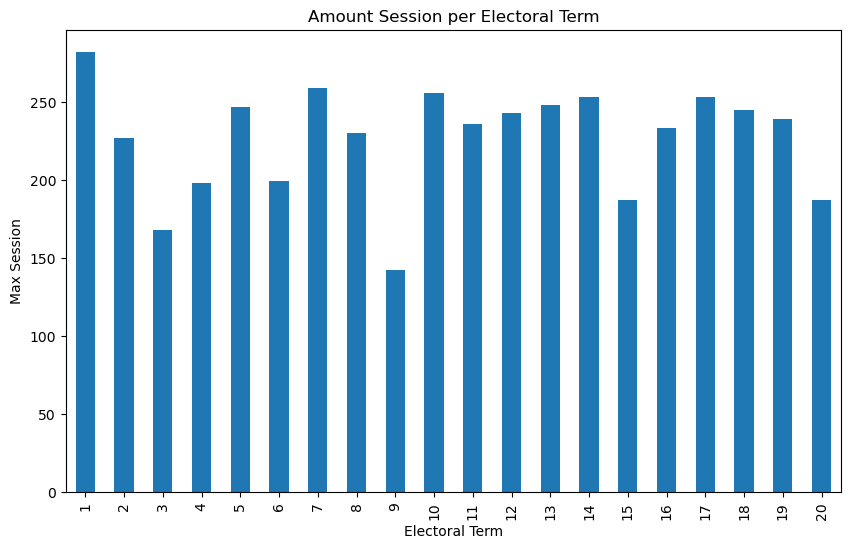

In [332]:
# Group by electoral term and find the maximum session
max_sessions = content_df.groupby('electoral_term')['session'].max()

# Plot the results
max_sessions.plot(kind='bar', figsize=(10, 6), title='Amount Session per Electoral Term')
plt.xlabel('Electoral Term')
plt.ylabel('Max Session')
plt.show()

### 2.2 Speaker per Electoral Term

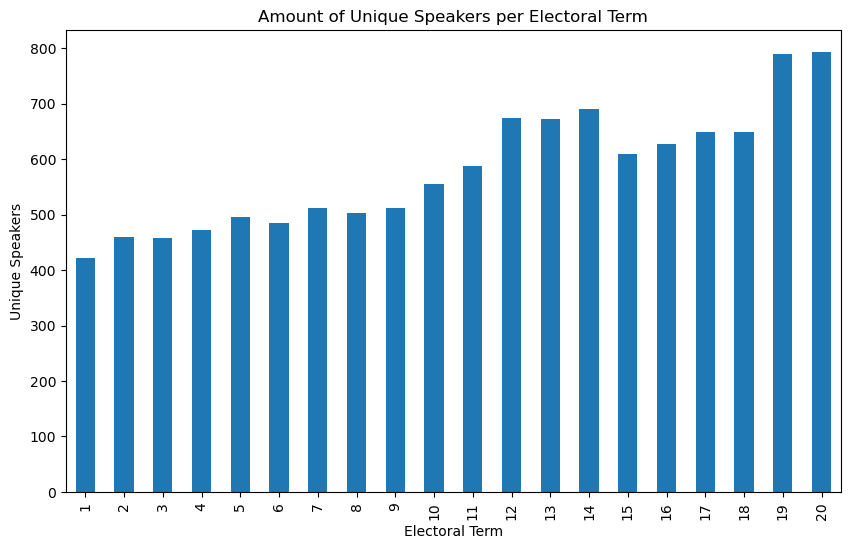

In [333]:
# Group by electoral term and count unique speakers
unique_speakers = content_df.groupby('electoral_term')['politician_id'].nunique()

# Plot the results
unique_speakers.plot(kind='bar', figsize=(10, 6), title='Amount of Unique Speakers per Electoral Term')
plt.xlabel('Electoral Term')
plt.ylabel('Unique Speakers')
plt.show()


### 3.3 Parties per Electoral Term

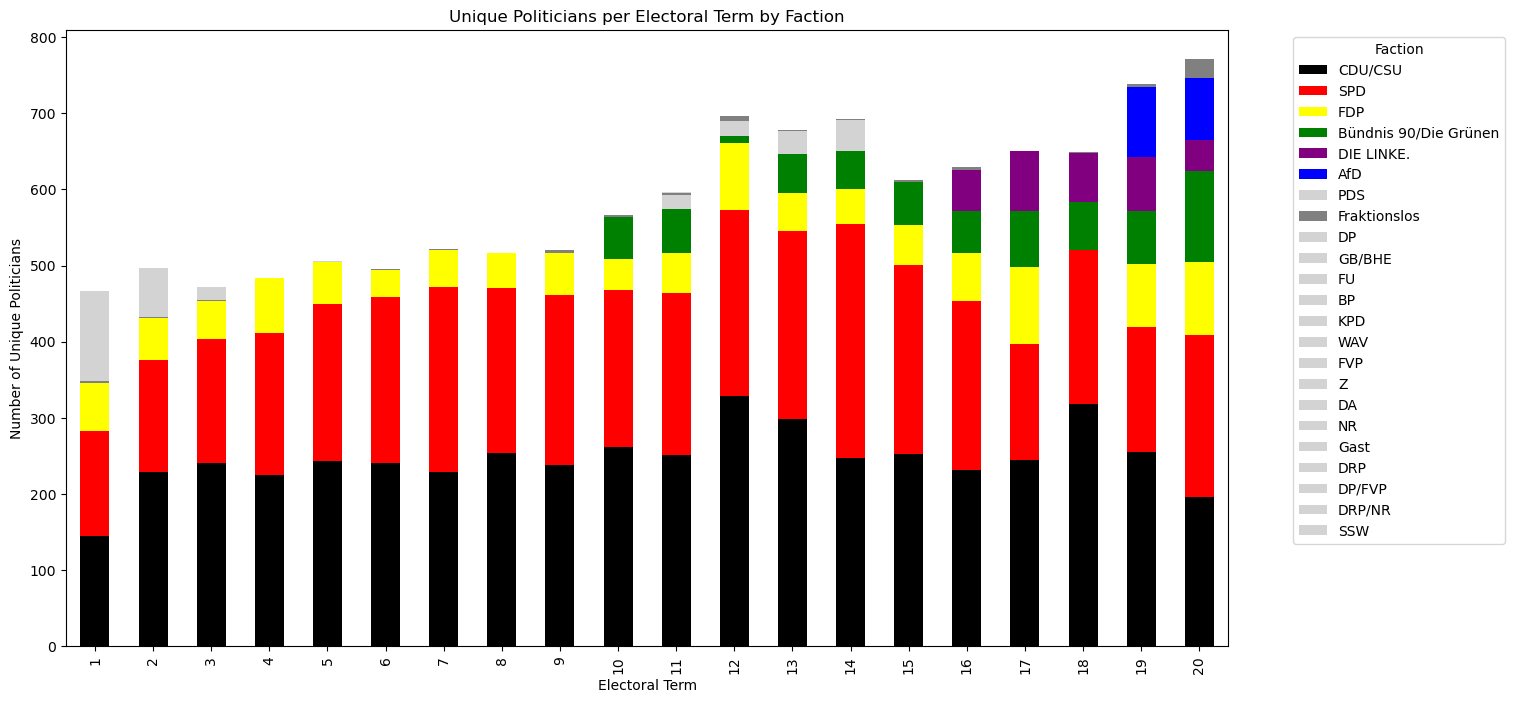

In [334]:
# Create a pivot table to count unique politician IDs per electoral term and faction
unique_politicians_per_faction = content_df.pivot_table(index='electoral_term', columns='faction', values='politician_id', aggfunc=pd.Series.nunique, fill_value=0)

# sort by largest faction
unique_politicians_per_faction = unique_politicians_per_faction[unique_politicians_per_faction.sum().sort_values(ascending=False).index]

# create individual color map assigning colors manually (e.g. CDU/CSU black)
color_map = {
    'CDU/CSU': 'black',
    'SPD': 'red',
    'FDP': 'yellow',
    'Bündnis 90/Die Grünen': 'green',
    'DIE LINKE.': 'purple',
    'AfD': 'blue',
    'Fraktionslos': 'grey'
}

# Plot the stacked bar chart with the individual color map, leaving all others in light grey
unique_politicians_per_faction.plot(kind='bar', stacked=True, figsize=(15, 8), color=[color_map.get(x, 'lightgrey') for x in unique_politicians_per_faction.columns], title='Unique Politicians per Electoral Term by Faction')
plt.xlabel('Electoral Term')
plt.ylabel('Number of Unique Politicians')
plt.legend(title='Faction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 3.4 Speaking time per faction

In [335]:
content_df.position_short.unique()

# of the content df, filter out all 'Presidium of Parliament' 
content_without_moderation = content_df[content_df.position_short != 'Presidium of Parliament']

# Per electoral term add all speeck content of thesame faction
speaking_per_party = content_without_moderation.groupby(['electoral_term', 'faction'])['speech_content'].apply(' '.join).reset_index()

speaking_per_party['length'] = speaking_per_party['speech_content'].apply(len)

speaking_per_party.head()

In [204]:
speaking_per_party.tail()

,electoral_term,faction,speech_content,length
112,20,CDU/CSU,"\n\nVielen Dank, Frau Präsidentin. – Frau Mini...",37357389
113,20,DIE LINKE.,"\n\nVielen Dank, Frau Präsidentin. – Meine Fra...",9818039
114,20,FDP,\n\nSehr geehrte Frau Präsidentin! Meine liebe...,21444339
115,20,Fraktionslos,"\n\nDanke, Frau Präsidentin. – Herr Bundesmini...",303695
116,20,SPD,"\n\nSehr gerne. Vielen Dank, Frau Präsidentin....",39436399


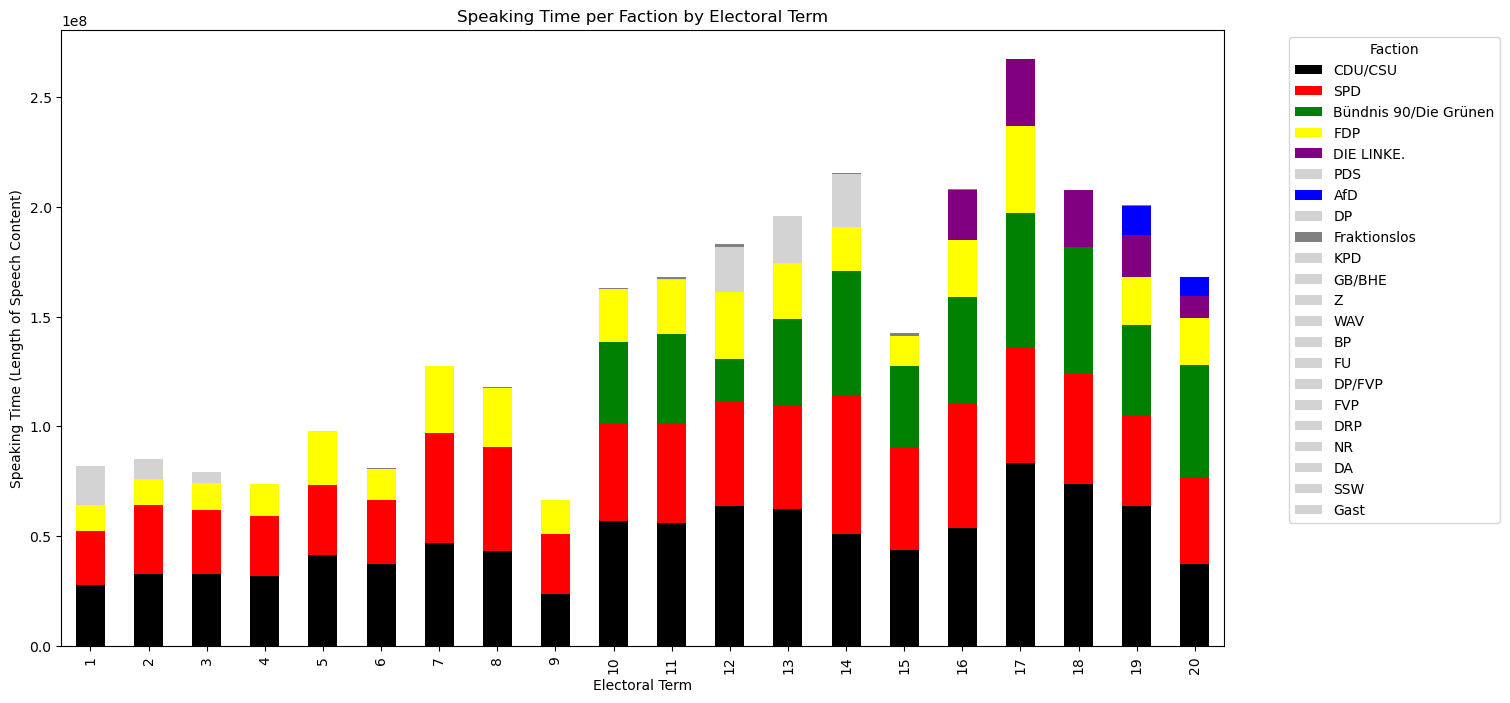

In [259]:
# Plot the results of speaking_per_party with the specified color code
speaking_per_party_pivot = speaking_per_party.pivot(index='electoral_term', columns='faction', values='length').fillna(0)

# Sort by largest faction
speaking_per_party_pivot = speaking_per_party_pivot[speaking_per_party_pivot.sum().sort_values(ascending=False).index]

# Plot the stacked bar chart with the individual color map, leaving all others in light grey
speaking_per_party_pivot.plot(kind='bar', stacked=True, figsize=(15, 8), color=[color_map.get(x, 'lightgrey') for x in speaking_per_party_pivot.columns], title='Speaking Time per Faction by Electoral Term')
plt.xlabel('Electoral Term')
plt.ylabel('Speaking Time (Length of Speech Content)')
plt.legend(title='Faction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 4. Analysis per Session

In [267]:
content_df


,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,speech_content,date,faction
0,0,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,Meine Damen und Herren! Ich eröffne die 2. Sit...,1949-09-11,CDU/CSU
1,1,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,arnold,-1,Guest,präsident des bundesrats,-1,"Der Bundesrat ist versammelt, Herr Präsident.\n",1949-09-11,NaN
2,2,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,Ich danke für diese Erklärung. Ich stelle dami...,1949-09-11,CDU/CSU
3,3,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,heuss,-1,Guest,bundespräsident,-1,"Ja, ich habe den Wunsch.\n",1949-09-11,NaN
4,4,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,Ich erteile dem Herrn Bundespräsidenten das Wo...,1949-09-11,CDU/CSU
...,...,...,...,...,...,...,...,...,...,...,...,...,...
922608,1075922,20,187,thomas,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,seitz,0,Not found,None,11004891,\n\nSehr geehrte Frau Präsidentin! Meine Damen...,2024-09-25,AfD
922609,1075923,20,187,petra,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,pau,7,Presidium of Parliament,Vizepräsidentin,11003206,\n\nHerr Abgeordneter.,2024-09-25,DIE LINKE.
922610,1075924,20,187,thomas,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,seitz,18,Member of Parliament,None,11004891,\n\nVielen Dank.\n\n({0}),2024-09-25,Fraktionslos
922611,1075925,20,187,petra,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,pau,7,Presidium of Parliament,Vizepräsidentin,11003206,\n\nFür die SPD-Fraktion hat die Kollegin Ange...,2024-09-25,DIE LINKE.


In [294]:
import datetime
# get all content from 25.01.2024
example_date = datetime.date(2015, 1, 27)

example_150127= content_df[content_df['date'] == example_date]

print(example_150127.head())

# safe as excel
example_150127.to_excel('example_150127.xlsx')

            id  electoral_term  session first_name  \
810852  810852              18       81      peter   
810853  810853              18       81      heiko   
810854  810854              18       81      peter   
810855  810855              18       81     volker   
810856  810856              18       81      heiko   

                                             document_url last_name  \
810852  https://dip21.bundestag.de/dip21/btp/18/18081.pdf    hintze   
810853  https://dip21.bundestag.de/dip21/btp/18/18081.pdf      maas   
810854  https://dip21.bundestag.de/dip21/btp/18/18081.pdf    hintze   
810855  https://dip21.bundestag.de/dip21/btp/18/18081.pdf      beck   
810856  https://dip21.bundestag.de/dip21/btp/18/18081.pdf      maas   

        faction_id           position_short  \
810852           5  Presidium of Parliament   
810853          25                 Minister   
810854           5  Presidium of Parliament   
810855           4     Member of Parliament   
810856       